# Matemática para Ciencia de los Datos
- Documento base: Saúl Calderón, Žiga Emeršič, Ángel García, Blaž Meden, Felipe Meza, Martín Solís, Juan Esquivel, Mauro Méndez, Manuel Zumbado, Luis-Alexánder Calvo-Valverde.


# PCA (Análisis de componentes principales)

El PCA se basa en el cálculo de los auto-valores y auto-vectores. Los auto-vectores $\vec{v}$ y auto valores $\lambda$ cumplen la siguiente ecuación:

$$A\vec{v}=\lambda\vec{v}\rightarrow(A-\lambda I)\,\vec{v}=0$$

Esta ecuación examina el comportamiento de la matriz A como una transformación de escalamiento (pues $\lambda\in\mathbb{R}$ es un escalar). Por ejemplo, en caso de que en la solución de tal sistema de ecuaciones se llegue a valores de $\lambda$ muy altos, se presenta un caso de escalamiento muy alto para el auto vector $\vec{v}$. 

En datos de dimensionalidades muy altas es frecuentemente útil encontrar cuales componentes (ejes o dimensiones de los datos) son los mas significativos, es decir, los principales. Por ejemplo, en la siguiente Figura se muestra gráficamente un conjunto de datos especifico en tres dimensiones. 

![](https://drive.google.com/uc?id=1g6zSWWT4BcOW30rt-wNoQeGtS40UhRpw)

El PCA se basa en el concepto de encontrar los vectores o dimensiones que aportan mayor información en la distribución de los datos observados. Esto significa encontrar los «ejes» que impliquen una mayor variación de los datos respecto a cada uno de ellos, tal y como lo ilustra la Figura siguiente:

![](https://drive.google.com/uc?id=1SYRvkaeTo5QRJoTqgsl5jvm18JuNTdRi)

Retomando brevemente unos conceptos:

![](https://drive.google.com/uc?id=1-YCVEq3WPj0N2UZSSFGJDK72qfdZ5UTw)

**Matriz de varianza-covarianza**

![](https://drive.google.com/uc?id=16oDSmgS-u-nbmJl9o7NAIT7YL4wMgOuS)


Los «ejes» con varianza baja respecto a los datos implican un aporte pequeño de información por lo que pueden ser descartados, como por ejemplo para el nuevo eje $ev_{3}$ diagramado en la siguiente Figura.

![](https://drive.google.com/uc?id=1DJed5Mz-iHsxgDVJUsJi1GMXBoCH9FX-)

Para encontrar tales «ejes», el PCA propone la descomposición en auto-valores y auto-vectores de la matriz de covarianza $\Sigma$ asociada a la matriz de datos A. La matriz de covarianza $\Sigma$ para datos de dimensionalidad $n$ es de dimensiones $n\,x\,n$, con la diagonal especificando la variación de los datos en cada dimensión, y en las entradas distintas a la diagonal, definiendo la variación entre el par de dimensiones especificas. 

Los «ejes» ejemplificados, al corresponder a los auto-vectores de la matriz de covarianza, tienen asociados auto-valores, los cuales definen el aporte en la distribución de los datos de su auto-vector. De esta manera es posible reducir la dimensionalidad de los datos, creando un nuevo espacio vectorial el cual incluye los auto-vectores con los valores mayores de sus auto-valores. 

Por ejemplo, tal reducción consiste en tomar los primeros auto-vectores, digamos dos, lo cual se grafica en la siguiente Figura

![](https://drive.google.com/uc?id=1fAaAWqW4Ut5Ms74QWvkkhU8EDWZoiU5A)

**El proceso de PCA es el siguiente:**

* Cálculo de la matriz de covarianza $\Sigma$ de la matriz $A$.

* Generación del nuevo espacio vectorial: Se calculan los auto-vectores $\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{q}\right\}$  y auto-valores correspondientes $\left\{ \lambda_{1},\lambda_{2},\ldots,\lambda_{q}\right\}$  y se eligen $n'<q$ auto-vectores más significativos para crear el nuevo espacio vectorial en $\mathbb{R}^{n'} \textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{n'}\right\}$  generado por tales auto-vectores.

* Proyección de los datos en el espacio $\mathbb{R}^{n}$ al nuevo espacio $\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2},\ldots,\vec{v}_{n'}\right\}$ , con dimensionalidad $\mathbb{R}^{n'}$. 



**Materiales:**
Explicación gráfica de PCA, incluyendo matriz de covarianza y auto-vectores y auto-valores. 
* Link: https://www.youtube.com/watch?v=AniiwysJ-2Y
* Promedio, varianza, co-varianza: Minuto 6:00
* Auto-vectores y auto-valores: de 15:45 a 23.10  (duración: 7 minutos 25 seguntos)
* Duración total del video:  31 minutos y 15 segundos


## Ejemplo: Conjunto de datos Iris

[Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 

Los datos son multivariados, con 150 mediciones de 4 atributos (length and width cm de ambos:  sepal and petal) en tres distintas especies de Iris. De las 150 mediciones, hay 50 mediciones para _Iris setosa_, _Iris versicolor_, e _Iris virginica_.

[Scikit Learn's `datasets`](http://scikit-learn.org/stable/datasets/) incluye el conjunto de datos Iris.

![](https://drive.google.com/uc?id=125KRc9v-vQ5dVfO2IR7jkqyRChoDtCHI)

Fuente: https://www.researchgate.net/publication/265877256_How_plants_grow_and_move/figures?lo=1

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 4]

In [3]:
# carga un dataset
iris = sklearn.datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Normaliza los datos en X
X_zscaled = (X - X.mean()) / X.std(ddof=1)

# carga Y
Y = pd.DataFrame(iris.target, columns=['target'])
Y['species'] = Y.apply(lambda r: iris.target_names[r])
print("Ejemplo de muestras del conjunto de datos:")
print(X.head(7))
print(Y.head(7))

tiposEspecies = np.unique(Y['species'] )
print("Tipos de especies: ", tiposEspecies)
print( X_zscaled[0:3])

print("\n\n\nNames:")
print( iris.target_names )
print("\n\n\nY")
print(Y)
print("\n\n\nY[species]")
print( Y['species']  )

Ejemplo de muestras del conjunto de datos:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
   target species
0       0  setosa
1       0  setosa
2       0  setosa
3       0  setosa
4       0  setosa
5       0  setosa
6       0  setosa
Tipos de especies:  ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.897674          1.015602          -1.335752         -1.3110

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
print( X_zscaled )

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.897674          1.015602          -1.335752         -1.311052
1            -1.139200         -0.131539          -1.335752         -1.311052
2            -1.380727          0.327318          -1.392399         -1.311052
3            -1.501490          0.097889          -1.279104         -1.311052
4            -1.018437          1.245030          -1.335752         -1.311052
..                 ...               ...                ...               ...
145           1.034539         -0.131539           0.816859          1.443994
146           0.551486         -1.278680           0.703564          0.919223
147           0.793012         -0.131539           0.816859          1.050416
148           0.430722          0.786174           0.930154          1.443994
149           0.068433         -0.131539           0.760211          0.788031

[150 rows x 4 columns]


In [11]:
eigenvalues, eigenvectors = np.linalg.eig( np.cov(X_zscaled,rowvar=False))

eigenvalues = eigenvalues / np.linalg.norm(eigenvalues)

np.linalg.norm(eigenvalues)

1.0

In [7]:
# calcula los auto-valores y auto-vectores
eigenvalues, eigenvectors = np.linalg.eig( np.cov(X_zscaled,rowvar=False))
'''
Para np.cov
rowvar : [bool, optional] If rowvar is True (default), then each row represents a
variable, with observations in the columns. Otherwise, the relationship is transposed
'''
# los normaliza
eigenvalues_normalized = eigenvalues / eigenvalues.sum()
# calcula la varianza explicada
cumvar_explained = np.cumsum(eigenvalues_normalized)

############################################################
# Ordenar de mayor a menor, 
# debido a que np.linalg.eig no asegura que vengan ordenados
idx = np.argsort(eigenvalues) 
print( "idx: ", idx )
idx = idx[::-1]     
print("\n\nidx[::-1]: ", idx  )

# Ordenar tanto los autovalroes como los autovectores
eigenvectors = eigenvectors[:,idx]
eigenvalues = eigenvalues[idx] 


print("Auto-valores:")
print(eigenvalues)
print("Auto-vectores:")
print( eigenvectors)
print("eigenvalues_normalized:")
print(eigenvalues_normalized)
print("Varianza explicada:")
print( cumvar_explained )


idx:  [3 2 1 0]


idx[::-1]:  [0 1 2 3]
Auto-valores:
[2.91849782 0.91403047 0.14675688 0.02071484]
Auto-vectores:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
eigenvalues_normalized:
[0.72962445 0.22850762 0.03668922 0.00517871]
Varianza explicada:
[0.72962445 0.95813207 0.99482129 1.        ]


In [8]:
# Proyecta los datos y los grafica
T = pd.DataFrame(X_zscaled.dot(eigenvectors))

# Nombres de columnas
T.columns = ['pc1', 'pc2', 'pc3', 'pc4']

# agrega la etiqueta de las especies
T = pd.concat([T, Y.species], axis=1)

print("Parte de las muestras proyectadas")
print(T.head(5))

Parte de las muestras proyectadas
        pc1       pc2       pc3       pc4 species
0 -2.257141 -0.478424 -0.127280  0.024088  setosa
1 -2.074013  0.671883 -0.233826  0.102663  setosa
2 -2.356335  0.340766  0.044054  0.028282  setosa
3 -2.291707  0.595400  0.090985 -0.065735  setosa
4 -2.381863 -0.644676  0.015686 -0.035803  setosa


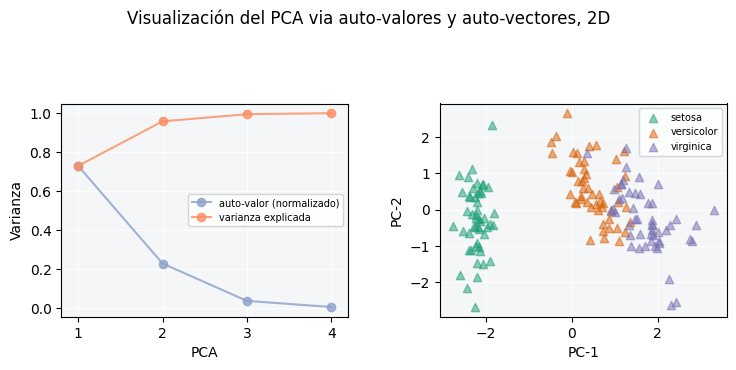

In [9]:
#########################################
# Primer gráfico
#########################################
# Separa por la etiqueta 
irises = [T[T.species=='setosa'], 
          T[T.species=='versicolor'], 
          T[T.species=='virginica']]

# define un color por especie
colors = ['#1b9e77', '#d95f02', '#7570b3']

_, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

# muestra el componente principal respecto al total de varianza en los datos
ax1.plot([1,2,3,4],
         eigenvalues_normalized,
         '-o',
         color='#8da0cb',
         label='auto-valor (normalizado)',
         alpha=0.8,
         zorder=1000)

ax1.plot([1,2,3,4],
         cumvar_explained,
         '-o',
         color='#fc8d62',
         label='varianza explicada',
         alpha=0.8,
         zorder=1000)

ax1.set_xlim(0.8, 4.2)
ax1.set_xticks([1,2,3,4])
ax1.set_xlabel('PCA')
ax1.set_ylabel('Varianza')
ax1.legend(loc='center right', fontsize=7)
ax1.grid(color='#fdfefe')
ax1.set_facecolor('#f4f6f7')

#########################################
# Segundo gráfico
#########################################
# Usa solo dos, pc1 y pc2
for group, color in zip(irises, colors):
    ax2.scatter(group.pc1,
                group.pc2,
                marker='^',
                color=color,
                label=group.species,
                alpha=0.5,
                zorder=1000)
ax2.set_xlabel(r'PC-1')
ax2.set_ylabel(r'PC-2')
ax2.grid(color='#fdfefe')
ax2.set_facecolor('#f4f6f7')
ax2.legend(labels=iris.target_names, fontsize=7)

plt.suptitle(r'Visualización del PCA via auto-valores y auto-vectores, 2D')
plt.tight_layout(pad=3.0)
plt.show()    